# Block-Silhouette Analysis for CogSci 2020

## Import and set up directories

In [15]:
import os
import sys
import urllib, io
os.getcwd()
sys.path.append("..")
proj_dir = os.path.abspath('../..')

if os.path.join(proj_dir,'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'stimuli'))

import numpy as np
import scipy.stats as stats
import pandas as pd
from random import random

import pymongo as pm
from collections import Counter
import json
import re
import ast

from PIL import Image, ImageOps, ImageDraw, ImageFont 

from io import BytesIO
import base64

import  matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import blockworld_helpers as utils
import drawing_utils as drawing
import importlib

In [3]:
## directory & file hierarchy
proj_dir = os.path.abspath('..')
datavol_dir = os.path.join(proj_dir,'data')
analysis_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))
results_dir = os.path.join(proj_dir,'results')
plot_dir = os.path.join(results_dir,'plots')
csv_dir = os.path.join(results_dir,'csv')
json_dir = os.path.join(results_dir,'json')
exp_dir = os.path.abspath(os.path.join(proj_dir,'experiments'))
png_dir = os.path.abspath(os.path.join(datavol_dir,'png'))
jefan_dir = os.path.join(analysis_dir,'jefan')
will_dir = os.path.join(analysis_dir,'will')

## add helpers to python path
if os.path.join(proj_dir,'stimuli') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'stimuli'))
    
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)   
    
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)       

## Load Data

In [4]:
iteration_name = 'Exp2Pilot1'

In [6]:
# Data already compiled into dataframes in CogSci 2020 Dataframe Generator

# Trial_end data
trial_path = os.path.join(csv_dir,'block_silhouette_{}.csv'.format(iteration_name))
df = pd.read_csv(trial_path)

# # Settled_block data
# settled_path = os.path.join(csv_dir,'block_silhouette_settled_{}.csv'.format(iterationName))
# dfs = pd.read_csv(settled_path)

# # Sanity Check- same participants in each dataset.
# df_participants = df.gameID.unique()
# dfs_participants = dfs.gameID.unique()
# assert collections.Counter(df_participants) == collections.Counter(dfs_participants)

# n_before_outliers = len(df_participants)
# print(str(n_before_outliers) + ' participants total')

In [8]:
# Exclude outliers
low_scores = df[(df.trialNum == 15) & (df.score == 0)]['gameID'] # people who achieved zero bonus

df = df[~df.gameID.isin(low_scores)]
#dfs = dfs[~dfs.gameID.isin(low_scores)]

n = df.gameID.nunique()
print(str(n) + ' participants with score > 0 and full set of trials')


3 participants with score > 0 and full set of trials


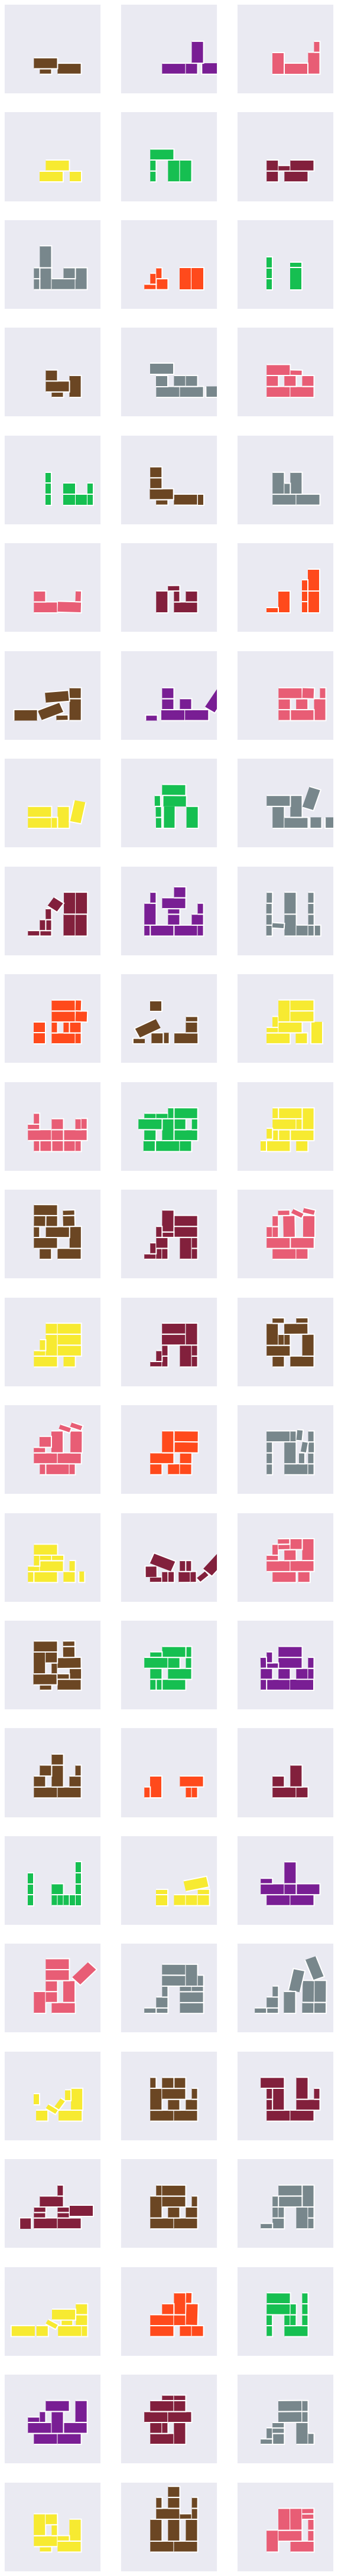

In [25]:
importlib.reload(drawing)
drawing.draw_all_trials(df, figsize=(10,80))